In [2]:
from utils import *

import wave
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt
import sklearn
import librosa
import urllib
import librosa.display
import warnings
from tqdm import tqdm

/Users/user/opt/anaconda3/envs/env/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Users/user/opt/anaconda3/envs/env/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [3]:
warnings.filterwarnings(action='ignore') 

In [4]:
PROJECT_DIR = get_upper_dir()
DATA_DIR = get_data_dir(PROJECT_DIR)
FEATURE_DIR = get_feature_dir(PROJECT_DIR)

In [10]:
DATA_DIR = '/Users/user/git/2015104199/프로젝트/data/test/'

In [12]:
name_list = os.listdir(DATA_DIR)

In [7]:
FEATURE_DIR = '/Users/user/git/2015104199/프로젝트/data/extract/'

In [19]:
name_list[0][:-6]

'angle_20_4'

In [8]:
def convert_mfcc(x, fs):
    mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc=40)
    mfccs = np.resize(mfccs, (40,150))
    mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
    
    return mfccs

In [25]:
def convert_stft(x, fs):
    D_octave = np.abs(librosa.core.stft(x))
    D_octave = np.resize(D_octave, (40, 150))
    return D_octave

In [26]:
def gcc_phat(sig1, sig2):
    pad1 = np.zeros(len(sig1))
    pad2 = np.zeros(len(sig2))
    sig1 = np.hstack([sig1, pad1])
    sig2 = np.hstack([sig2, pad2])
    f_sig1 = scipy.fftpack.fft(sig1, 6000)
    f_sig2 = scipy.fftpack.fft(sig2, 6000)
    f_sig2_c = np.conj(f_sig2)
    f_sig = f_sig1 * f_sig2_c
    denom = abs(f_sig)

    f_sig = f_sig / denom
    return np.abs(scipy.fftpack.ifft(f_sig, 6000))

In [24]:
import audioop

In [26]:
def rms(sig):
    return audioop.rms(sig, 2)

In [29]:
feature_list = []
label_list = []

for name in tqdm(name_list):
    ch1_name = DATA_DIR + '/' + name + '_ch1.wav'
    ch2_name = DATA_DIR + '/' + name + '_ch2.wav'

    x1, fs1 = librosa.load(ch1_name)
    x2, fs2 = librosa.load(ch2_name)
    
    mfcc1 = convert_mfcc(x1, fs1)
    mfcc2 = convert_mfcc(x2, fs2)
    mfcc = mfcc2 - mfcc1
    
    stft1 = convert_stft(x1, fs1)
    stft2 = convert_stft(x2, fs2)
    stft = stft2 - stft1
    
    gcc = gcc_phat(x1, x2)
    gcc = gcc.reshape([-1, 150])
    
    feature = np.concatenate((mfcc, stft, gcc), axis=0)
    label = name[-3:]
    
    np.save(DATA_DIR + '/direction_' + name +'.npy', feature_list)
    #np.save(FEATURE_DIR + 'direction/' + 'label2.npy', np.array(label_list))

100%|██████████| 30/30 [00:08<00:00,  3.55it/s]


In [ ]:
name_list[99][-3:]

In [57]:
ch1_name = DATA_DIR + '/' + name_list[199] + '_ch1.wav'
ch2_name = DATA_DIR + '/' + name_list[199] + '_ch2.wav'
x1, fs1 = librosa.load(ch1_name)
x2, fs2 = librosa.load(ch2_name)

In [9]:
mfcc1 = convert_mfcc(x1, fs1)

In [14]:
lpc_10_1 = LPC(x1, 10)

In [15]:
lpc_10_1

array([   1.        ,   -7.47176933,   26.70705232,  -59.68409469,
         92.14293739, -102.65423442,   83.68503334,  -49.40785977,
         20.29410557,   -5.26480268,    0.66227019])

In [ ]:
librosa.display.specshow(mfcc1, sr=fs1, x_axis='time')

In [ ]:
librosa.display.specshow(mfcc2, sr=fs1, x_axis='time')

In [ ]:
stft1 = convert_stft(x1, fs1)
stft2 = convert_stft(x2, fs2)
stft = stft2 - stft1

In [ ]:
gcc = gcc_phat(x1, x2)
gcc = gcc.reshape([-1, 150])

In [ ]:
print(mfcc.shape)
print(stft.shape)
print(gcc.shape)

In [ ]:
result = np.concatenate((mfcc, stft, gcc), axis=0)

In [ ]:
result.shape

In [ ]:
DATA_DIR

In [29]:
ch1_name

'/Users/user/git/2015104199/프로젝트/data/output_noisy_file/data_816_39_angle_160_ch1.wav'

In [32]:
chunks = np.array_split(x1, 20)

In [39]:
len(chunks[0])

2458

In [10]:
from librosa import lpc
from scipy.fft import dct, idct
from scipy.fft import fft

In [11]:
def LPC(x, order):
    x_norm = x/(len(x)*len(x))
    filt = lpc(x_norm, order)
    return filt

In [12]:
def fft_cepstrum(x, N, order):
    yr = fft(x, n=order)
    yr = yr*(1/N)
    return yr

In [13]:
def match_label(x):
    if x == '01' or x == '06' or x == '09' or x == '23' or x == '24' or x == '27' or x == '30' or \
        x == '33' or x == '35' or x == '36' or x == '44' or x == '48':
        return 'F'
    elif x == '02' or x == '03' or x == '05' or x == '10' or x == '12' or x == '15' or x == '16' or \
        x == '18' or x == '21' or x == '22' or x == '28' or x == '28' or x == '31' or x == '34' or \
        x == '37' or x == '40' or x == '41' or x == '43' or x == '47':
        return 'K'
    else : return 'M'

In [31]:
feature_list = []
label_list = []
num = 0
for name in tqdm(name_list):
    ch1_name = DATA_DIR + '/' + name + '_ch1.wav'
    ch2_name = DATA_DIR + '/' + name + '_ch2.wav'
    
    idx = name[:-10][-2:]
    label = match_label(idx)
    
    x1, fs1 = librosa.load(ch1_name)
    x2, fs2 = librosa.load(ch2_name)
    try:
        mfcc1 = convert_mfcc(x1, fs1)
        mfcc2 = convert_mfcc(x2, fs2)
        
        lpc_10_1 = LPC(x1, 10)
        lpc_10_2 = LPC(x2, 10)
        lpc_12_1 = LPC(x1, 12)
        lpc_12_2 = LPC(x2, 12)
        lpc_14_1 = LPC(x1, 14)
        lpc_14_2 = LPC(x2, 14)

        fft_8_1 = fft_cepstrum(x1, len(x1), 8)
        fft_8_2 = fft_cepstrum(x2, len(x2), 8)
        fft_12_1 = fft_cepstrum(x1, len(x1), 12)
        fft_12_2 = fft_cepstrum(x2, len(x2), 12)
        
        feature = np.concatenate((lpc_10_1, lpc_12_1, fft_8_1, fft_12_1), axis=0)
        feature_list.append(feature)
        label_list.append(label)

        feature = np.concatenate((lpc_10_2, lpc_12_2, fft_8_2, fft_12_2), axis=0)
        feature_list.append(feature)
        label_list.append(label)
        
    except:
        num += 1
        continue
    
    np.save(DATA_DIR + '/gender_' + name +'.npy', feature_list)
    #np.save(FEATURE_DIR + 'gender_age/' + 'label1.npy', np.array(label_list))   

100%|██████████| 30/30 [00:07<00:00,  3.88it/s]


In [9]:
name_list

['angle_60',
 'angle_120',
 'angle_80',
 'angle_140',
 'angle_160',
 'angle_100',
 'angle_40',
 'angle_0',
 'angle_20',
 '.',
 'angle_180']

In [22]:
feature_list = []
label_list = []
num = 0
for name in tqdm(name_list):
    x1, fs1 = librosa.load(DATA_DIR + name)
    try:
        mfcc1 = convert_mfcc(x1, fs1)
        
    except:
        num += 1
        continue
    
    np.save(FEATURE_DIR + 'gender_' + name[:-6] + '.npy', mfcc1)
    #np.save(FEATURE_DIR + 'gender_age/' + 'label3.npy', np.array(label_list))   

100%|██████████| 50/50 [00:05<00:00,  9.36it/s]


In [64]:
xx = np.resize(x1,(int(x1.shape[0]/1000),1000))

In [65]:
xx.shape

(62, 1000)

In [66]:
for i in range (xx.shape[1]):
    lpc_10_1 = LPC(xx[i], 10)
#    lpc_10_2 = LPC(x2[i], 10)
    lpc_12_1 = LPC(xx[i], 12)
#    lpc_12_2 = LPC(x2[i], 12)
    lpc_14_1 = LPC(xx[i], 14)
#    lpc_14_2 = LPC(x2[i], 14)

    lpc = np.concatenate((lpc_10_1, lpc_12_1, lpc_14_1))
    break

In [68]:
lpc.shape

(39,)

In [312]:
r_12

array([ 5.6824638e-07+0.0000000e+00j,  2.4513686e-06+1.4408027e-06j,
       -3.7701747e-07-3.5517360e-08j, -1.3579654e-07-1.3030548e-08j,
       -8.0050178e-08-6.6232202e-09j, -6.0451768e-08-2.9320950e-09j,
       -5.5271521e-08-0.0000000e+00j, -6.0451768e-08+2.9320950e-09j,
       -8.0050178e-08+6.6232202e-09j, -1.3579654e-07+1.3030548e-08j,
       -3.7701747e-07+3.5517360e-08j,  2.4513686e-06-1.4408027e-06j],
      dtype=complex64)

In [158]:
r_8

array([-2.1472832e-08-0.0000000e+00j,  3.5054573e-08+3.1722449e-09j,
       -3.1050695e-09+2.3825310e-08j, -1.3643614e-08+1.0246094e-08j,
       -1.5522817e-08-0.0000000e+00j, -1.3643614e-08-1.0246094e-08j,
       -3.1050695e-09-2.3825310e-08j,  3.5054573e-08-3.1722449e-09j],
      dtype=complex64)

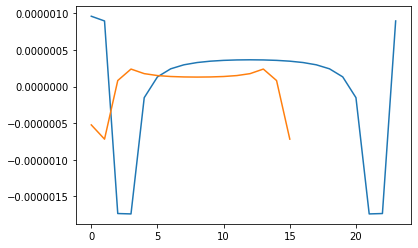

In [153]:
plt.plot(r_12)
plt.plot(r_8)
plt.show()

In [124]:
r_8 = fft_cepstrum(x1, len(x1), 8)

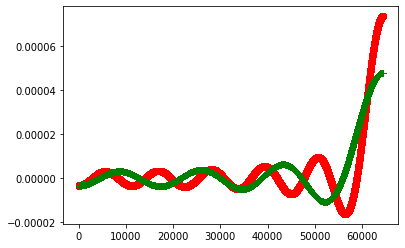

In [121]:
plt.plot(r_12, 'ro')
plt.plot(r_8, 'g+')
plt.show()

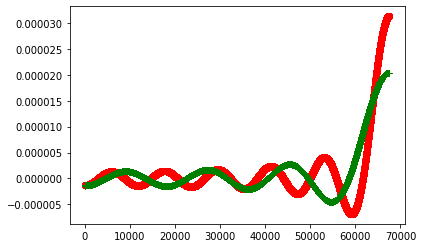

In [125]:
plt.plot(r_12, 'ro')
plt.plot(r_8, 'g+')
plt.show()

In [126]:
len(r_12)

67531